# Code for Classification of MNIST Dataset

#### This project I did as part of my learning and understanding basics of CNN, Neural Networks, and tools- keras.
#### Link to MNIST webpage http://yann.lecun.com/exdb/mnist/


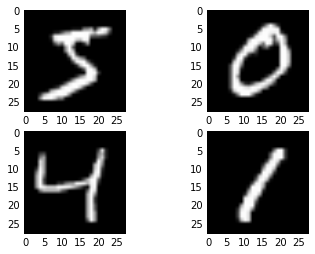

In [2]:
# importing necessary libraries and MNIST dataset
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#plot to show 4 images
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [3]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [4]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [5]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [10]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2782 - acc: 0.9210 - val_loss: 0.1409 - val_acc: 0.9574
Epoch 2/10
 - 6s - loss: 0.1114 - acc: 0.9675 - val_loss: 0.0923 - val_acc: 0.9708
Epoch 3/10
 - 6s - loss: 0.0719 - acc: 0.9796 - val_loss: 0.0784 - val_acc: 0.9769
Epoch 4/10
 - 5s - loss: 0.0506 - acc: 0.9856 - val_loss: 0.0744 - val_acc: 0.9772
Epoch 5/10
 - 5s - loss: 0.0375 - acc: 0.9892 - val_loss: 0.0672 - val_acc: 0.9792
Epoch 6/10
 - 6s - loss: 0.0270 - acc: 0.9927 - val_loss: 0.0616 - val_acc: 0.9807
Epoch 7/10
 - 6s - loss: 0.0211 - acc: 0.9948 - val_loss: 0.0615 - val_acc: 0.9814
Epoch 8/10
 - 6s - loss: 0.0141 - acc: 0.9968 - val_loss: 0.0626 - val_acc: 0.9802
Epoch 9/10
 - 7s - loss: 0.0108 - acc: 0.9978 - val_loss: 0.0594 - val_acc: 0.9809
Epoch 10/10
 - 6s - loss: 0.0080 - acc: 0.9985 - val_loss: 0.0590 - val_acc: 0.9816
Baseline Error: 1.84%


In [11]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [12]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [13]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [14]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [15]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [16]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 186s - loss: 0.2232 - acc: 0.9364 - val_loss: 0.0775 - val_acc: 0.9751
Epoch 2/10
 - 172s - loss: 0.0708 - acc: 0.9787 - val_loss: 0.0446 - val_acc: 0.9859
Epoch 3/10
 - 170s - loss: 0.0507 - acc: 0.9846 - val_loss: 0.0425 - val_acc: 0.9861
Epoch 4/10
 - 178s - loss: 0.0387 - acc: 0.9880 - val_loss: 0.0408 - val_acc: 0.9873
Epoch 5/10
 - 166s - loss: 0.0321 - acc: 0.9900 - val_loss: 0.0348 - val_acc: 0.9884
Epoch 6/10
 - 175s - loss: 0.0265 - acc: 0.9919 - val_loss: 0.0323 - val_acc: 0.9895
Epoch 7/10
 - 173s - loss: 0.0220 - acc: 0.9928 - val_loss: 0.0336 - val_acc: 0.9888
Epoch 8/10
 - 184s - loss: 0.0189 - acc: 0.9942 - val_loss: 0.0326 - val_acc: 0.9887
Epoch 9/10
 - 184s - loss: 0.0156 - acc: 0.9950 - val_loss: 0.0312 - val_acc: 0.9899
Epoch 10/10
 - 188s - loss: 0.0138 - acc: 0.9958 - val_loss: 0.0328 - val_acc: 0.9895
CNN Error: 1.05%


In [17]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [18]:
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [19]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.3872 - acc: 0.8819 - val_loss: 0.0864 - val_acc: 0.9727
Epoch 2/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0978 - acc: 0.9704 - val_loss: 0.0550 - val_acc: 0.9830
Epoch 3/10
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0716 - acc: 0.9777 - val_loss: 0.0413 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 155s 3ms/step - loss: 0.0586 - acc: 0.9823 - val_loss: 0.0360 - val_acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0509 - acc: 0.9840 - val_loss: 0.0344 - val_acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 155s 3ms/step - loss: 0.0440 - acc: 0.9861 - val_loss: 0.0296 - val_acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0383 - acc: 0.9879 - val_loss: 0.0292 - 

In [20]:
#reference-https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/